Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  2  0  1  4  0]
 [ 0  0  0  0 45  0  0  0  1  2]
 [ 0  0  0  0  0 44  1  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  1  0  1  0  0  0 43]]
0.9666666666666667
Prediction for test image:  [5]


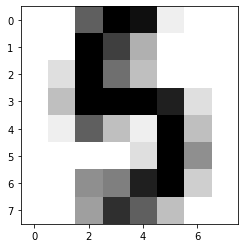

In [3]:
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# The digits dataset
digits = datasets.load_digits()

#print("Digits\n", digits)

images_and_labels = list(zip(digits.images, digits.target))

# To see some specific number of the images and the respective target.(in this case only 2 rows and 3 columns i.e. 6items)
#for index, (image, label) in enumerate(images_and_labels[:6]):
#    plt.subplot(2, 3, index + 1)
#    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#    plt.title('Target: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
#print("Data\n",data)

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
trainTestSplit = int(n_samples*0.75)
classifier.fit(data[:trainTestSplit], digits.target[:trainTestSplit])

# Now predict the value of the digit on the second half:
expected = digits.target[trainTestSplit:]
predicted = classifier.predict(data[trainTestSplit:])

#print("Classification report for classifier %s:\n%s\n"
#% (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print(accuracy_score(expected, predicted))


# let's test on the last few images
plt.imshow(digits.images[-10], cmap=plt.cm.gray_r, interpolation='nearest')
print("Prediction for test image: ", classifier.predict(data[-10].reshape(1,-1)))

plt.show()
